In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')



In [2]:
biao1=r'D:\code\数学建模模版\数据集\竞赛发布数据\表1-患者列表及临床信息.xlsx'
biao2=r'D:\code\数学建模模版\数据集\竞赛发布数据\表2-患者影像信息血肿及水肿的体积及位置.xlsx'
biao3=r'D:\code\数学建模模版\数据集\竞赛发布数据\表3-患者影像信息血肿及水肿的形状及灰度分布.xlsx'
biao4=r'D:\code\数学建模模版\数据集\竞赛发布数据\1a.xlsx'
biao11=pd.read_excel(biao1)
biao21=pd.read_excel(biao2)
biao31=pd.read_excel(biao3)
biao41=pd.read_excel(biao4)



In [3]:
biao12=biao11.iloc[:,4:23]
biao22=biao21.iloc[:,2:24]
biao12


,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,发病到首次影像检查时间间隔,血压,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经
0,43,女,0,0,0,0,0,0,0,0,2.5,180/90,0,1,1,1,1,1,1
1,58,男,0,1,0,0,0,0,0,0,3.0,199/120,0,1,1,1,0,1,1
2,78,男,0,1,0,0,0,0,0,0,2.0,199/120,0,1,1,1,1,1,1
3,70,男,2,1,1,0,0,0,0,0,1.0,186/99,0,1,1,1,0,0,0
4,51,男,0,0,0,0,0,0,0,0,5.0,135/92,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,87,女,0,1,0,0,0,1,0,0,5.5,202/100,0,1,1,1,0,1,1
156,52,男,2,1,1,0,0,0,1,0,0.5,180/110,1,0,1,1,1,1,1
157,57,男,0,1,0,0,0,0,0,0,2.8,233/135,0,1,1,1,1,1,1
158,47,男,0,1,0,0,0,0,1,1,3.0,183/122,0,1,1,1,1,1,1


In [4]:
j=0
for i in biao12['性别']:
    if i=='男':
        biao12['性别'][j]=0
    else:
        biao12['性别'][j]=1
    j=j+1


In [5]:
biao12

,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,发病到首次影像检查时间间隔,血压,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经
0,43,1,0,0,0,0,0,0,0,0,2.5,180/90,0,1,1,1,1,1,1
1,58,0,0,1,0,0,0,0,0,0,3.0,199/120,0,1,1,1,0,1,1
2,78,0,0,1,0,0,0,0,0,0,2.0,199/120,0,1,1,1,1,1,1
3,70,0,2,1,1,0,0,0,0,0,1.0,186/99,0,1,1,1,0,0,0
4,51,0,0,0,0,0,0,0,0,0,5.0,135/92,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,87,1,0,1,0,0,0,1,0,0,5.5,202/100,0,1,1,1,0,1,1
156,52,0,2,1,1,0,0,0,1,0,0.5,180/110,1,0,1,1,1,1,1
157,57,0,0,1,0,0,0,0,0,0,2.8,233/135,0,1,1,1,1,1,1
158,47,0,0,1,0,0,0,0,1,1,3.0,183/122,0,1,1,1,1,1,1


In [6]:
biao12['血压']

0       180/90
1      199/120
2      199/120
3       186/99
4       135/92
        ...   
155    202/100
156    180/110
157    233/135
158    183/122
159     208/95
Name: 血压, Length: 160, dtype: object

In [7]:
high=[]
low=[]

for i in biao12['血压']:
    a,b=str(i).split('/')
    high.append(int(a))
    low.append(int(b))


In [8]:
list1=pd.DataFrame(high)
list2=pd.DataFrame(low)
biao12['高压']=list1
biao12['低压']=list2
biao12

,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,...,血压,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经,高压,低压
0,43,1,0,0,0,0,0,0,0,0,...,180/90,0,1,1,1,1,1,1,180,90
1,58,0,0,1,0,0,0,0,0,0,...,199/120,0,1,1,1,0,1,1,199,120
2,78,0,0,1,0,0,0,0,0,0,...,199/120,0,1,1,1,1,1,1,199,120
3,70,0,2,1,1,0,0,0,0,0,...,186/99,0,1,1,1,0,0,0,186,99
4,51,0,0,0,0,0,0,0,0,0,...,135/92,0,1,1,0,0,1,1,135,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,87,1,0,1,0,0,0,1,0,0,...,202/100,0,1,1,1,0,1,1,202,100
156,52,0,2,1,1,0,0,0,1,0,...,180/110,1,0,1,1,1,1,1,180,110
157,57,0,0,1,0,0,0,0,0,0,...,233/135,0,1,1,1,1,1,1,233,135
158,47,0,0,1,0,0,0,0,1,1,...,183/122,0,1,1,1,1,1,1,183,122


<h2>表2进行操作</h2>

In [9]:
biao22

,HM_volume,HM_ACA_R_Ratio,HM_MCA_R_Ratio,HM_PCA_R_Ratio,HM_Pons_Medulla_R_Ratio,HM_Cerebellum_R_Ratio,HM_ACA_L_Ratio,HM_MCA_L_Ratio,HM_PCA_L_Ratio,HM_Pons_Medulla_L_Ratio,...,ED_ACA_R_Ratio,ED_MCA_R_Ratio,ED_PCA_R_Ratio,ED_Pons_Medulla_R_Ratio,ED_Cerebellum_R_Ratio,ED_ACA_L_Ratio,ED_MCA_L_Ratio,ED_PCA_L_Ratio,ED_Pons_Medulla_L_Ratio,ED_Cerebellum_L_Ratio
0,69714,0.000258,0.877112,0.120148,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.108833,0.726241,0.136511,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,47500,0.496000,0.180779,0.302316,0.000000,0.0,0.003032,0.000000,0.003705,0.000000,...,0.198121,0.544249,0.246876,0.000000,0.0,0.000000,0.000000,0.002083,0.000000,0.0
2,86396,0.053718,0.829078,0.099681,0.000197,0.0,0.000000,0.000000,0.000000,0.000000,...,0.162533,0.748352,0.075013,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,45498,0.002242,0.002198,0.029100,0.000374,0.0,0.163458,0.313618,0.385753,0.000110,...,0.020864,0.002298,0.012483,0.000000,0.0,0.444685,0.433689,0.081880,0.000000,0.0
4,14832,0.000000,0.000000,0.001146,0.000337,0.0,0.000202,0.413363,0.549892,0.022047,...,0.044501,0.418341,0.011690,0.003735,0.0,0.080288,0.341260,0.078093,0.001435,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,32559,0.000000,0.033754,0.000000,0.000000,0.0,0.038545,0.922049,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.370986,0.629014,0.000000,0.000000,0.0
156,18150,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.997410,0.002590,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0
157,27969,0.002682,0.937359,0.059959,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.009583,0.808725,0.160686,0.003622,0.0,0.000000,0.000000,0.000000,0.000000,0.0
158,53154,0.000000,0.000000,0.000000,0.000000,0.0,0.004572,0.857678,0.131429,0.004346,...,0.000000,0.000000,0.000000,0.000000,0.0,0.147678,0.711019,0.124740,0.008247,0.0


In [10]:
#获取列表名
column_names = biao22.columns.tolist()
for i in column_names:
    biao12[i]=biao22[i]
biao12


,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,...,ED_ACA_R_Ratio,ED_MCA_R_Ratio,ED_PCA_R_Ratio,ED_Pons_Medulla_R_Ratio,ED_Cerebellum_R_Ratio,ED_ACA_L_Ratio,ED_MCA_L_Ratio,ED_PCA_L_Ratio,ED_Pons_Medulla_L_Ratio,ED_Cerebellum_L_Ratio
0,43,1,0,0,0,0,0,0,0,0,...,0.108833,0.726241,0.136511,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,58,0,0,1,0,0,0,0,0,0,...,0.198121,0.544249,0.246876,0.000000,0.0,0.000000,0.000000,0.002083,0.000000,0.0
2,78,0,0,1,0,0,0,0,0,0,...,0.162533,0.748352,0.075013,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,70,0,2,1,1,0,0,0,0,0,...,0.020864,0.002298,0.012483,0.000000,0.0,0.444685,0.433689,0.081880,0.000000,0.0
4,51,0,0,0,0,0,0,0,0,0,...,0.044501,0.418341,0.011690,0.003735,0.0,0.080288,0.341260,0.078093,0.001435,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,87,1,0,1,0,0,0,1,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.370986,0.629014,0.000000,0.000000,0.0
156,52,0,2,1,1,0,0,0,1,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0
157,57,0,0,1,0,0,0,0,0,0,...,0.009583,0.808725,0.160686,0.003622,0.0,0.000000,0.000000,0.000000,0.000000,0.0
158,47,0,0,1,0,0,0,0,1,1,...,0.000000,0.000000,0.000000,0.000000,0.0,0.147678,0.711019,0.124740,0.008247,0.0


<h2>表3进行操作</h2>

In [11]:
biao32=biao31.iloc[:,1:33]
biao14=biao11.iloc[:160,3]
biao32

,流水号,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,...,NCCT_original_firstorder_MeanAbsoluteDeviation,NCCT_original_firstorder_Mean,NCCT_original_firstorder_Median,NCCT_original_firstorder_Minimum,NCCT_original_firstorder_Range,NCCT_original_firstorder_RobustMeanAbsoluteDeviation,NCCT_original_firstorder_RootMeanSquared,NCCT_original_firstorder_Skewness,NCCT_original_firstorder_Uniformity,NCCT_original_firstorder_Variance
0,20160117000135,0.809020,0.452364,21.460961,47.441786,62.265560,51.884487,47.201695,66.105976,3277.375000,...,8.804495,60.479072,62.363129,25.625693,68.636402,6.426142,61.421799,-0.464143,0.115781,114.919202
1,20160117000328,0.765948,0.528562,31.533788,59.659533,59.033889,58.051701,59.033889,69.864154,5004.291667,...,7.011415,63.060397,63.564973,25.287045,70.502845,4.876413,63.676979,-0.196186,0.141840,78.143978
2,20160118001751,0.796400,0.587009,32.071978,54.636247,61.131007,61.522354,51.244512,65.559134,5505.625000,...,8.909079,63.057433,63.207367,25.162122,86.779325,5.970173,64.096201,0.158409,0.137676,132.083050
3,20160129000231,0.694317,0.421746,25.947301,61.523496,61.619802,46.754679,43.566042,62.880840,10200.375000,...,10.581386,48.338894,48.073538,8.273075,82.476919,7.699185,50.029409,-0.005145,0.109191,166.293121
4,20160209000219,0.799275,0.569239,15.224112,26.744665,39.319207,39.849718,37.000000,45.497253,1765.291667,...,8.845794,49.344928,50.737956,16.756305,61.928524,6.387522,50.518385,-0.384037,0.101547,117.185249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,20201220000450,0.827879,0.470224,31.216469,66.386440,60.207973,68.410526,54.626001,69.426220,12046.333333,...,6.200542,41.046376,41.498166,2.956345,68.718750,4.238372,41.807731,-0.347183,0.156049,63.081441
572,20201221000155,0.744377,0.472333,33.915553,71.804340,63.285069,65.855903,52.038447,68.782265,15178.791667,...,5.925110,36.124757,36.330849,-0.981156,68.236807,4.081957,36.899017,-0.211160,0.161276,56.539331
573,20201223000130,0.749719,0.435269,32.104800,73.758476,62.641839,69.354164,55.758407,70.320694,18574.083333,...,6.747741,33.486701,33.870047,-4.041351,79.282432,4.682721,34.553995,-0.178790,0.164277,72.619453
574,20201223002079,0.927183,0.579222,34.656447,59.832715,56.603887,68.883960,69.778220,78.879655,44159.041667,...,5.964170,42.195763,41.743571,8.313232,69.899800,4.474350,42.858022,-0.042917,0.169254,56.327579


In [12]:
columns_3=biao32.columns.tolist()
df = pd.DataFrame(columns=columns_3)
j=0
for i in biao14:
    rox= biao32.loc[biao32['流水号'] == i]
    df.loc[j]=rox.iloc[0,:].tolist()
    j+=1
df    


,流水号,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,...,NCCT_original_firstorder_MeanAbsoluteDeviation,NCCT_original_firstorder_Mean,NCCT_original_firstorder_Median,NCCT_original_firstorder_Minimum,NCCT_original_firstorder_Range,NCCT_original_firstorder_RobustMeanAbsoluteDeviation,NCCT_original_firstorder_RootMeanSquared,NCCT_original_firstorder_Skewness,NCCT_original_firstorder_Uniformity,NCCT_original_firstorder_Variance
0,2.016121e+13,0.757486,0.362598,28.776261,79.361352,60.016664,68.007353,67.779053,74.148500,16795.208333,...,8.247517,53.100174,54.277975,2.630186,88.333203,5.421960,54.182743,-0.680312,0.156607,116.141179
1,2.016041e+13,0.910996,0.457808,25.505005,55.711193,57.982756,52.478567,55.758407,63.765194,9128.250000,...,5.767857,37.252825,37.518627,11.670399,54.126259,3.986374,37.958520,-0.176969,0.132046,53.076248
2,2.016041e+13,0.889822,0.413966,32.302338,78.031463,69.115845,88.836929,70.405966,89.409172,11952.375000,...,7.659346,35.163065,35.410096,-1.715890,70.139106,5.382112,36.444232,-0.057096,0.128060,91.740851
3,2.016122e+13,0.458216,0.280059,22.553405,80.530949,48.373546,57.870545,65.000000,72.945185,8590.833333,...,8.911068,30.191045,30.926762,-20.991359,92.048538,6.191501,32.204819,-0.297133,0.145292,125.651157
4,2.016122e+13,0.622986,0.332085,36.704810,110.528262,102.883429,109.329776,112.805142,118.785521,21773.833333,...,9.250453,45.985845,46.492200,-9.889141,96.821808,6.482624,47.428035,-0.227378,0.146488,134.720581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2.020031e+13,0.895164,0.508865,20.149184,39.596326,40.249224,47.074409,42.201896,53.376025,2601.000000,...,10.403959,30.983828,31.471558,-19.978141,111.297179,7.310788,33.601480,-0.068704,0.151482,169.061898
156,2.020101e+13,0.546845,0.193570,9.851486,50.893740,32.310989,20.615528,28.160256,43.150898,51.000000,...,3.651153,48.347970,48.533011,30.460776,29.788433,2.260258,48.602582,-0.239727,0.125220,24.684739
157,2.020041e+13,0.876148,0.676306,31.058874,45.924265,43.931765,46.647615,45.398238,48.270074,6078.416667,...,6.783101,53.006514,53.345998,20.456862,65.707611,4.718427,53.690717,-0.079589,0.136352,73.002568
158,2.020022e+13,0.613648,0.325678,22.859551,70.190620,59.059292,56.320511,59.439044,60.844063,4941.166667,...,8.423220,36.981876,37.092745,-5.551496,72.713624,5.802628,38.494810,-0.202350,0.120587,114.191236


In [13]:
columns_4=biao32.columns.tolist()[1:]
for i in columns_4:
    biao12[i]=df[i]
biao12

,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,...,NCCT_original_firstorder_MeanAbsoluteDeviation,NCCT_original_firstorder_Mean,NCCT_original_firstorder_Median,NCCT_original_firstorder_Minimum,NCCT_original_firstorder_Range,NCCT_original_firstorder_RobustMeanAbsoluteDeviation,NCCT_original_firstorder_RootMeanSquared,NCCT_original_firstorder_Skewness,NCCT_original_firstorder_Uniformity,NCCT_original_firstorder_Variance
0,43,1,0,0,0,0,0,0,0,0,...,8.247517,53.100174,54.277975,2.630186,88.333203,5.421960,54.182743,-0.680312,0.156607,116.141179
1,58,0,0,1,0,0,0,0,0,0,...,5.767857,37.252825,37.518627,11.670399,54.126259,3.986374,37.958520,-0.176969,0.132046,53.076248
2,78,0,0,1,0,0,0,0,0,0,...,7.659346,35.163065,35.410096,-1.715890,70.139106,5.382112,36.444232,-0.057096,0.128060,91.740851
3,70,0,2,1,1,0,0,0,0,0,...,8.911068,30.191045,30.926762,-20.991359,92.048538,6.191501,32.204819,-0.297133,0.145292,125.651157
4,51,0,0,0,0,0,0,0,0,0,...,9.250453,45.985845,46.492200,-9.889141,96.821808,6.482624,47.428035,-0.227378,0.146488,134.720581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,87,1,0,1,0,0,0,1,0,0,...,10.403959,30.983828,31.471558,-19.978141,111.297179,7.310788,33.601480,-0.068704,0.151482,169.061898
156,52,0,2,1,1,0,0,0,1,0,...,3.651153,48.347970,48.533011,30.460776,29.788433,2.260258,48.602582,-0.239727,0.125220,24.684739
157,57,0,0,1,0,0,0,0,0,0,...,6.783101,53.006514,53.345998,20.456862,65.707611,4.718427,53.690717,-0.079589,0.136352,73.002568
158,47,0,0,1,0,0,0,0,1,1,...,8.423220,36.981876,37.092745,-5.551496,72.713624,5.802628,38.494810,-0.202350,0.120587,114.191236


<h2>表4的操作</h2>

biao42=biao41.iloc[:,3]
biao12['target']=biao42

In [14]:
biao12

,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,...,NCCT_original_firstorder_MeanAbsoluteDeviation,NCCT_original_firstorder_Mean,NCCT_original_firstorder_Median,NCCT_original_firstorder_Minimum,NCCT_original_firstorder_Range,NCCT_original_firstorder_RobustMeanAbsoluteDeviation,NCCT_original_firstorder_RootMeanSquared,NCCT_original_firstorder_Skewness,NCCT_original_firstorder_Uniformity,NCCT_original_firstorder_Variance
0,43,1,0,0,0,0,0,0,0,0,...,8.247517,53.100174,54.277975,2.630186,88.333203,5.421960,54.182743,-0.680312,0.156607,116.141179
1,58,0,0,1,0,0,0,0,0,0,...,5.767857,37.252825,37.518627,11.670399,54.126259,3.986374,37.958520,-0.176969,0.132046,53.076248
2,78,0,0,1,0,0,0,0,0,0,...,7.659346,35.163065,35.410096,-1.715890,70.139106,5.382112,36.444232,-0.057096,0.128060,91.740851
3,70,0,2,1,1,0,0,0,0,0,...,8.911068,30.191045,30.926762,-20.991359,92.048538,6.191501,32.204819,-0.297133,0.145292,125.651157
4,51,0,0,0,0,0,0,0,0,0,...,9.250453,45.985845,46.492200,-9.889141,96.821808,6.482624,47.428035,-0.227378,0.146488,134.720581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,87,1,0,1,0,0,0,1,0,0,...,10.403959,30.983828,31.471558,-19.978141,111.297179,7.310788,33.601480,-0.068704,0.151482,169.061898
156,52,0,2,1,1,0,0,0,1,0,...,3.651153,48.347970,48.533011,30.460776,29.788433,2.260258,48.602582,-0.239727,0.125220,24.684739
157,57,0,0,1,0,0,0,0,0,0,...,6.783101,53.006514,53.345998,20.456862,65.707611,4.718427,53.690717,-0.079589,0.136352,73.002568
158,47,0,0,1,0,0,0,0,1,1,...,8.423220,36.981876,37.092745,-5.551496,72.713624,5.802628,38.494810,-0.202350,0.120587,114.191236


<h2>删除血压一列</h2>

In [15]:
biao12 = biao12.drop('血压', axis=1)
biao12

,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,...,NCCT_original_firstorder_MeanAbsoluteDeviation,NCCT_original_firstorder_Mean,NCCT_original_firstorder_Median,NCCT_original_firstorder_Minimum,NCCT_original_firstorder_Range,NCCT_original_firstorder_RobustMeanAbsoluteDeviation,NCCT_original_firstorder_RootMeanSquared,NCCT_original_firstorder_Skewness,NCCT_original_firstorder_Uniformity,NCCT_original_firstorder_Variance
0,43,1,0,0,0,0,0,0,0,0,...,8.247517,53.100174,54.277975,2.630186,88.333203,5.421960,54.182743,-0.680312,0.156607,116.141179
1,58,0,0,1,0,0,0,0,0,0,...,5.767857,37.252825,37.518627,11.670399,54.126259,3.986374,37.958520,-0.176969,0.132046,53.076248
2,78,0,0,1,0,0,0,0,0,0,...,7.659346,35.163065,35.410096,-1.715890,70.139106,5.382112,36.444232,-0.057096,0.128060,91.740851
3,70,0,2,1,1,0,0,0,0,0,...,8.911068,30.191045,30.926762,-20.991359,92.048538,6.191501,32.204819,-0.297133,0.145292,125.651157
4,51,0,0,0,0,0,0,0,0,0,...,9.250453,45.985845,46.492200,-9.889141,96.821808,6.482624,47.428035,-0.227378,0.146488,134.720581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,87,1,0,1,0,0,0,1,0,0,...,10.403959,30.983828,31.471558,-19.978141,111.297179,7.310788,33.601480,-0.068704,0.151482,169.061898
156,52,0,2,1,1,0,0,0,1,0,...,3.651153,48.347970,48.533011,30.460776,29.788433,2.260258,48.602582,-0.239727,0.125220,24.684739
157,57,0,0,1,0,0,0,0,0,0,...,6.783101,53.006514,53.345998,20.456862,65.707611,4.718427,53.690717,-0.079589,0.136352,73.002568
158,47,0,0,1,0,0,0,0,1,1,...,8.423220,36.981876,37.092745,-5.551496,72.713624,5.802628,38.494810,-0.202350,0.120587,114.191236


<h2>提取100个</h2>

In [16]:
biao18=biao12.iloc[:100,:]


In [17]:
biao42=biao41.iloc[:,1]
biao18['target']=biao42
biao18


,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,...,NCCT_original_firstorder_Mean,NCCT_original_firstorder_Median,NCCT_original_firstorder_Minimum,NCCT_original_firstorder_Range,NCCT_original_firstorder_RobustMeanAbsoluteDeviation,NCCT_original_firstorder_RootMeanSquared,NCCT_original_firstorder_Skewness,NCCT_original_firstorder_Uniformity,NCCT_original_firstorder_Variance,target
0,43,1,0,0,0,0,0,0,0,0,...,53.100174,54.277975,2.630186,88.333203,5.421960,54.182743,-0.680312,0.156607,116.141179,0.0
1,58,0,0,1,0,0,0,0,0,0,...,37.252825,37.518627,11.670399,54.126259,3.986374,37.958520,-0.176969,0.132046,53.076248,0.0
2,78,0,0,1,0,0,0,0,0,0,...,35.163065,35.410096,-1.715890,70.139106,5.382112,36.444232,-0.057096,0.128060,91.740851,1.0
3,70,0,2,1,1,0,0,0,0,0,...,30.191045,30.926762,-20.991359,92.048538,6.191501,32.204819,-0.297133,0.145292,125.651157,0.0
4,51,0,0,0,0,0,0,0,0,0,...,45.985845,46.492200,-9.889141,96.821808,6.482624,47.428035,-0.227378,0.146488,134.720581,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,93,1,0,0,0,0,0,0,0,0,...,44.469975,45.627698,-1.353307,75.353316,4.764270,45.427431,-0.852965,0.155848,86.072788,0.0
96,83,1,0,1,0,0,0,0,0,0,...,49.624525,49.646822,10.589739,69.684072,5.654763,50.616489,-0.047266,0.121547,99.435503,0.0
97,82,0,0,1,1,1,1,1,1,0,...,35.911280,35.494566,-2.467873,98.855412,5.523299,37.597608,0.432499,0.166861,123.960058,1.0
98,53,0,0,1,0,0,0,0,0,0,...,41.019959,41.559362,3.177012,66.837891,4.002934,41.752598,-0.318306,0.159415,60.642372,1.0


In [18]:
biao43=biao41.iloc[:,3]
#biao12['target']=biao43

<h2>进行数值处理</h2>

In [19]:
biao12.to_csv('./数据集/test1.txt', sep='\t', index=False)
#biao18.to_csv('./数据集/train.txt', sep='\t', index=False)
train=biao18
test=biao12
biao12

,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,...,NCCT_original_firstorder_MeanAbsoluteDeviation,NCCT_original_firstorder_Mean,NCCT_original_firstorder_Median,NCCT_original_firstorder_Minimum,NCCT_original_firstorder_Range,NCCT_original_firstorder_RobustMeanAbsoluteDeviation,NCCT_original_firstorder_RootMeanSquared,NCCT_original_firstorder_Skewness,NCCT_original_firstorder_Uniformity,NCCT_original_firstorder_Variance
0,43,1,0,0,0,0,0,0,0,0,...,8.247517,53.100174,54.277975,2.630186,88.333203,5.421960,54.182743,-0.680312,0.156607,116.141179
1,58,0,0,1,0,0,0,0,0,0,...,5.767857,37.252825,37.518627,11.670399,54.126259,3.986374,37.958520,-0.176969,0.132046,53.076248
2,78,0,0,1,0,0,0,0,0,0,...,7.659346,35.163065,35.410096,-1.715890,70.139106,5.382112,36.444232,-0.057096,0.128060,91.740851
3,70,0,2,1,1,0,0,0,0,0,...,8.911068,30.191045,30.926762,-20.991359,92.048538,6.191501,32.204819,-0.297133,0.145292,125.651157
4,51,0,0,0,0,0,0,0,0,0,...,9.250453,45.985845,46.492200,-9.889141,96.821808,6.482624,47.428035,-0.227378,0.146488,134.720581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,87,1,0,1,0,0,0,1,0,0,...,10.403959,30.983828,31.471558,-19.978141,111.297179,7.310788,33.601480,-0.068704,0.151482,169.061898
156,52,0,2,1,1,0,0,0,1,0,...,3.651153,48.347970,48.533011,30.460776,29.788433,2.260258,48.602582,-0.239727,0.125220,24.684739
157,57,0,0,1,0,0,0,0,0,0,...,6.783101,53.006514,53.345998,20.456862,65.707611,4.718427,53.690717,-0.079589,0.136352,73.002568
158,47,0,0,1,0,0,0,0,1,1,...,8.423220,36.981876,37.092745,-5.551496,72.713624,5.802628,38.494810,-0.202350,0.120587,114.191236


<h2>相关性分析</h2>



<h3>Kde图</h3>

<h3>删除冗余数据</h3>

In [20]:
column_r = test.columns.tolist()[20:] # 获取列名列表
column_rd=[]
for i in column_r:
    n1=(test[i][:100]==0).sum()
    n2=(test[i][:100]!=0).sum()
    if n1*1.0/(n2+n1)>=0.9:
        column_rd.append(i)
# 进行冗余值的处理

column_rd
# n=(test['ED_Cerebellum_R_Ratio'][:100]!=0).sum()
# n

['HM_Cerebellum_R_Ratio',
 'HM_Cerebellum_L_Ratio',
 'ED_Cerebellum_R_Ratio',
 'ED_Cerebellum_L_Ratio']

In [21]:
test.drop(columns=column_rd, inplace=True)
test

,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,...,NCCT_original_firstorder_MeanAbsoluteDeviation,NCCT_original_firstorder_Mean,NCCT_original_firstorder_Median,NCCT_original_firstorder_Minimum,NCCT_original_firstorder_Range,NCCT_original_firstorder_RobustMeanAbsoluteDeviation,NCCT_original_firstorder_RootMeanSquared,NCCT_original_firstorder_Skewness,NCCT_original_firstorder_Uniformity,NCCT_original_firstorder_Variance
0,43,1,0,0,0,0,0,0,0,0,...,8.247517,53.100174,54.277975,2.630186,88.333203,5.421960,54.182743,-0.680312,0.156607,116.141179
1,58,0,0,1,0,0,0,0,0,0,...,5.767857,37.252825,37.518627,11.670399,54.126259,3.986374,37.958520,-0.176969,0.132046,53.076248
2,78,0,0,1,0,0,0,0,0,0,...,7.659346,35.163065,35.410096,-1.715890,70.139106,5.382112,36.444232,-0.057096,0.128060,91.740851
3,70,0,2,1,1,0,0,0,0,0,...,8.911068,30.191045,30.926762,-20.991359,92.048538,6.191501,32.204819,-0.297133,0.145292,125.651157
4,51,0,0,0,0,0,0,0,0,0,...,9.250453,45.985845,46.492200,-9.889141,96.821808,6.482624,47.428035,-0.227378,0.146488,134.720581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,87,1,0,1,0,0,0,1,0,0,...,10.403959,30.983828,31.471558,-19.978141,111.297179,7.310788,33.601480,-0.068704,0.151482,169.061898
156,52,0,2,1,1,0,0,0,1,0,...,3.651153,48.347970,48.533011,30.460776,29.788433,2.260258,48.602582,-0.239727,0.125220,24.684739
157,57,0,0,1,0,0,0,0,0,0,...,6.783101,53.006514,53.345998,20.456862,65.707611,4.718427,53.690717,-0.079589,0.136352,73.002568
158,47,0,0,1,0,0,0,0,1,1,...,8.423220,36.981876,37.092745,-5.551496,72.713624,5.802628,38.494810,-0.202350,0.120587,114.191236


<h2>箱线图</h2>

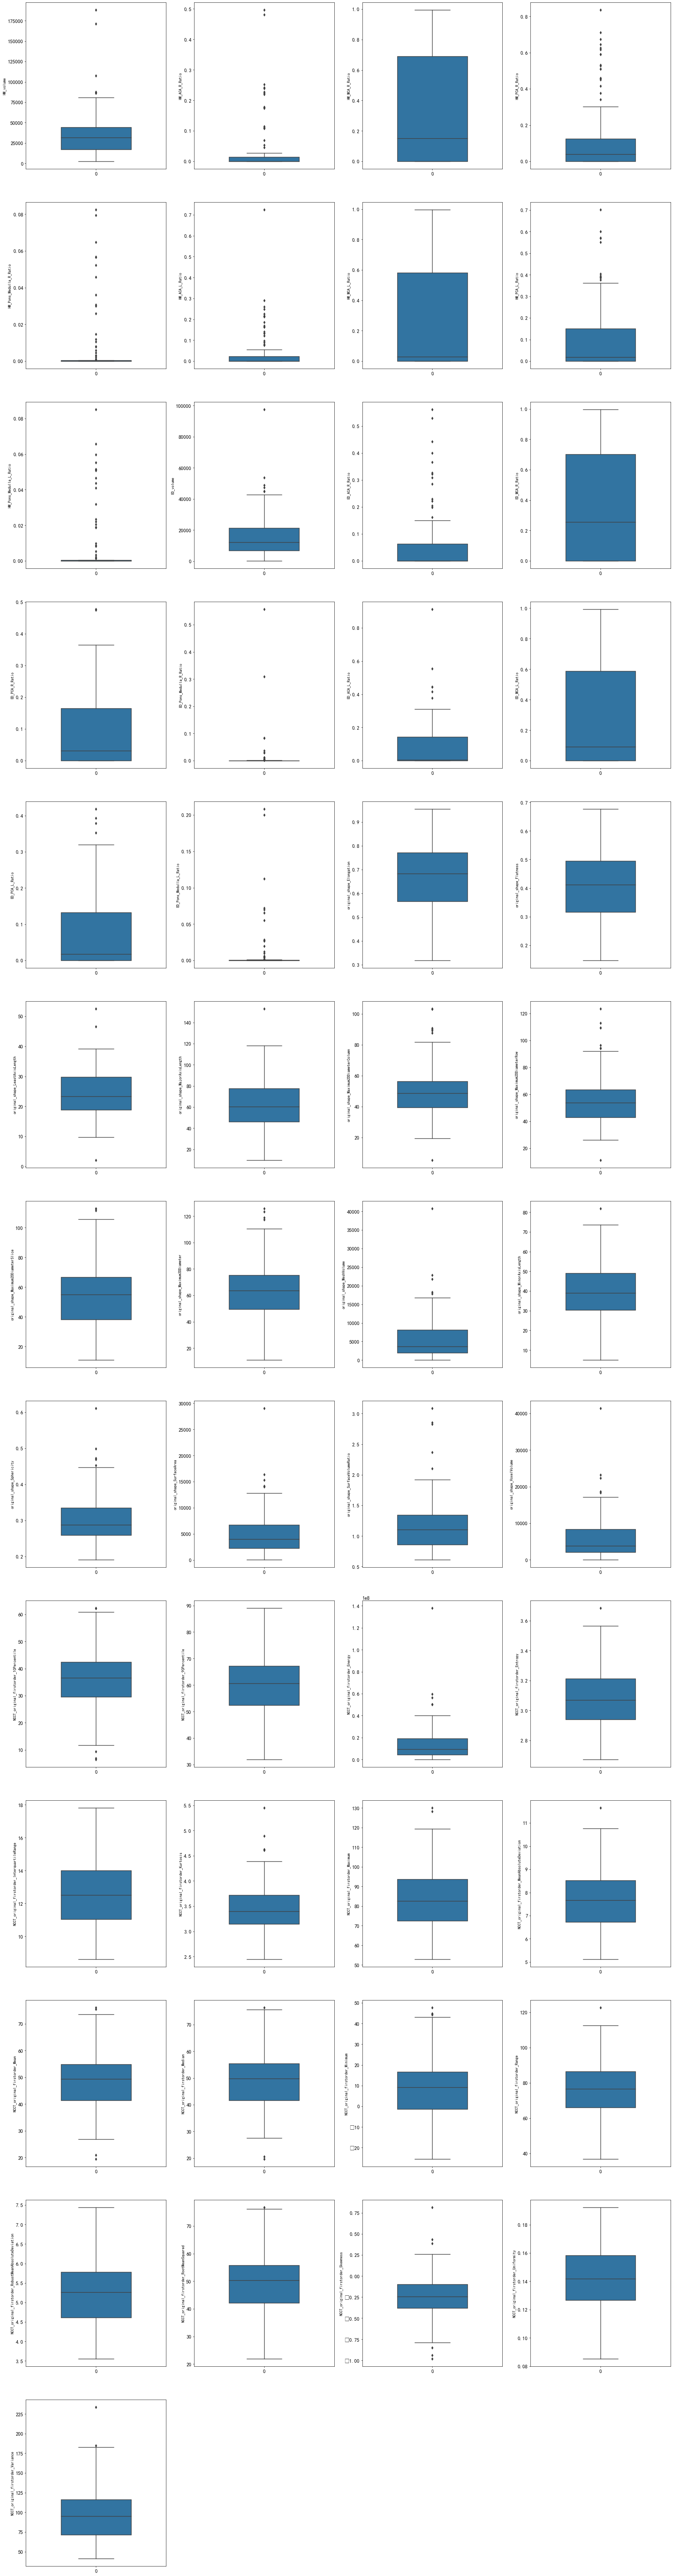

In [22]:
column_xbox=test.columns.tolist()[20:]
from matplotlib.font_manager import FontProperties
fig = plt.figure(figsize=(30, 120), dpi=70) # 设置绘图对象的尺寸
j=1
my_font = FontProperties(fname='SourceHanSansSC-Bold.otf')
plt.rc('font', family='SimHei', size=13)
for i in column_xbox:
    plt.subplot(13, 4, j) # 创建子图
    sns.boxplot(test[i][:100], orient="v", width=0.5) # 绘制箱线图
    plt.ylabel(i, fontsize=10)
    j+=1
plt.show()

<h2>3sigma分析</h2>
    

from matplotlib.font_manager import FontProperties
fig = plt.figure(figsize=(30, 120), dpi=70) # 设置绘图对象的尺寸
my_font = FontProperties(fname='SourceHanSansSC-Bold.otf')
plt.rc('font', family='SimHei', size=13)

i=0
for col in test.columns[20:]:
    i+=1
    ax=plt.subplot(13,4,i) # ax代表这个绘图窗口上的坐标系axis             创建子图
    sns.distplot(test[col],fit=stats.norm)

In [28]:
def sigma(x):
    mean_d=x.mean()
    std = x.std()  # 计算数据列的标准差
    threshold =  3*std  # 根据3σ原则计算异常值的阈值
    mean = x.loc[abs(x - mean_d) <= threshold].mean()  # 排除异常值后的均值
    x.loc[abs(x - mean_d) > threshold] = mean                                                              # 将异常值换成均值
column_sigma = test.columns.tolist()
test = test.iloc[:100,:]
for i in column_sigma:
    sigma(test[i])


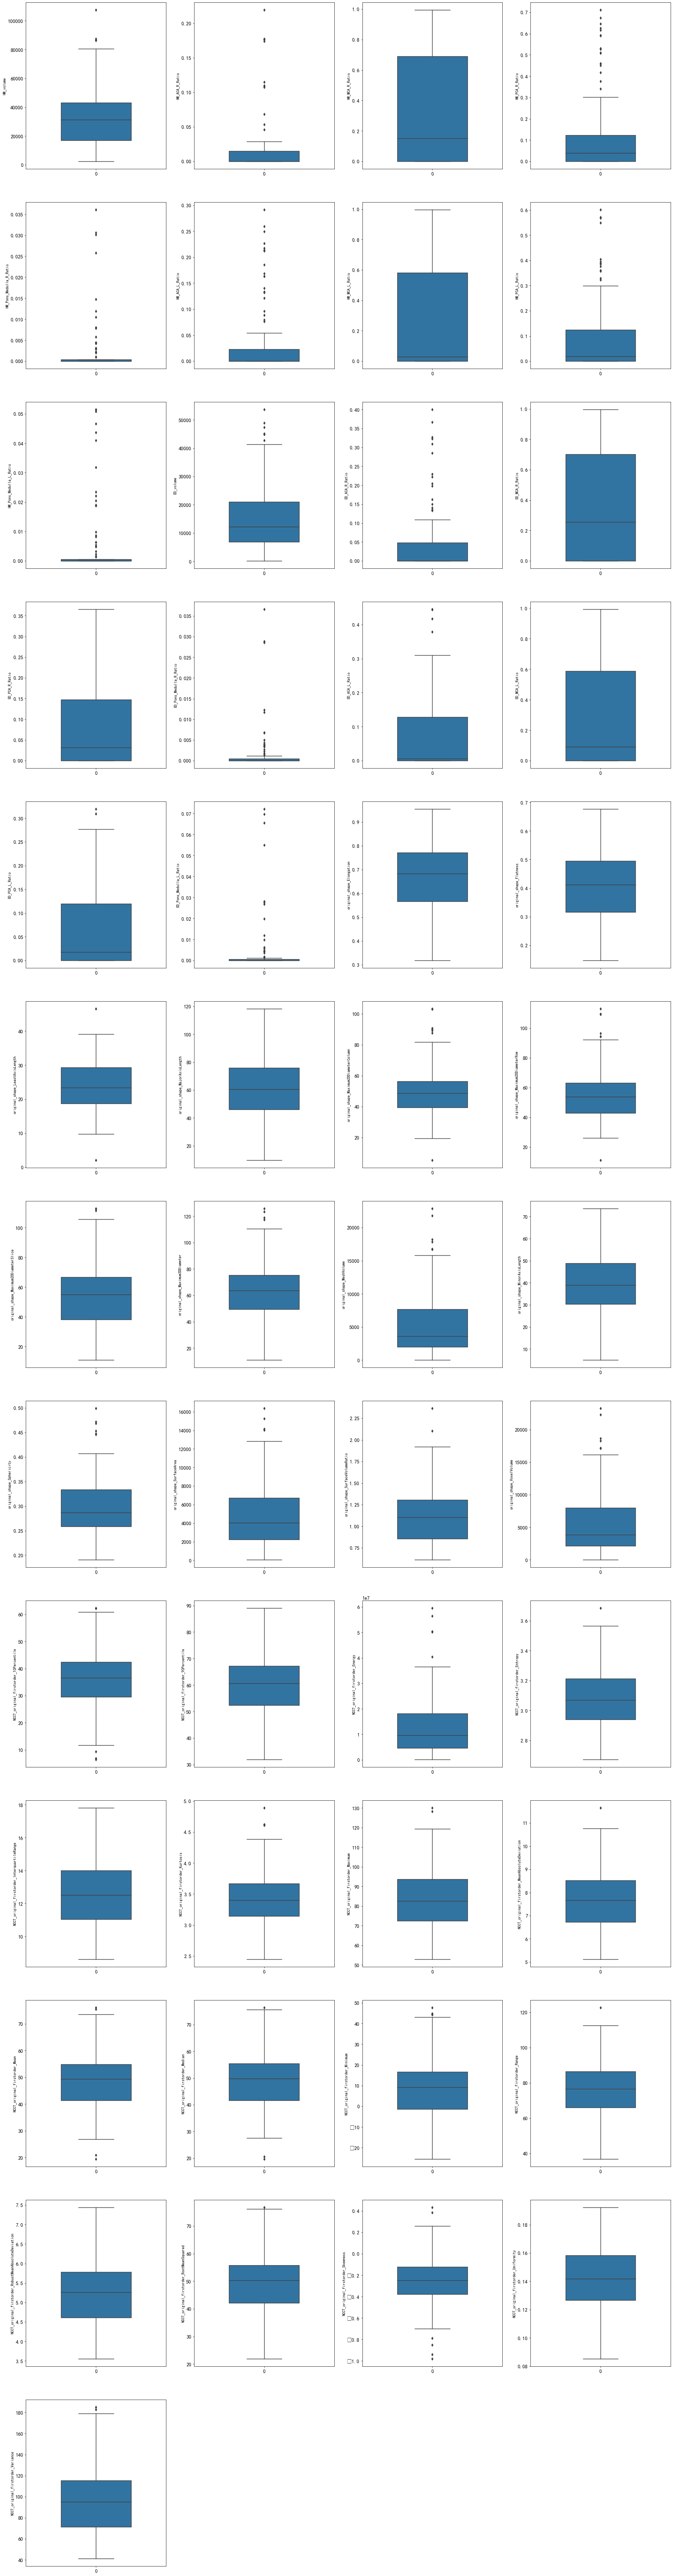

In [29]:
from matplotlib.font_manager import FontProperties
fig = plt.figure(figsize=(30, 120), dpi=70) # 设置绘图对象的尺寸
j=1
my_font = FontProperties(fname='SourceHanSansSC-Bold.otf')
plt.rc('font', family='SimHei', size=13)
for i in column_xbox:
    plt.subplot(13, 4, j) # 创建子图
    sns.boxplot(test[i][:100], orient="v", width=0.5) # 绘制箱线图
    plt.ylabel(i, fontsize=10)
    j+=1
plt.show()

<h2>直方图 QQ图</h2>

<h2>归一化</h2>

In [307]:
columns_no = test.columns.tolist()[20:]

# 循环遍历每一列，分别进行归一化处理
for column_name in columns_no:
    column_data = test[column_name]
    min_value = column_data.min()
    max_value = column_data.max()
    normalized_data = (column_data - min_value) / (max_value - min_value)
    test[column_name] = normalized_data

# 打印处理后的 DataFrame
test

,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,...,NCCT_original_firstorder_MeanAbsoluteDeviation,NCCT_original_firstorder_Mean,NCCT_original_firstorder_Median,NCCT_original_firstorder_Minimum,NCCT_original_firstorder_Range,NCCT_original_firstorder_RobustMeanAbsoluteDeviation,NCCT_original_firstorder_RootMeanSquared,NCCT_original_firstorder_Skewness,NCCT_original_firstorder_Uniformity,NCCT_original_firstorder_Variance
0,43,1,0,0,0,0,0,0,0,0,...,0.641088,0.595461,0.610924,0.384876,0.704806,0.637172,0.589076,0.168612,0.667961,0.485375
1,58,0,0,1,0,0,0,0,0,0,...,0.379288,0.315197,0.315317,0.508402,0.409791,0.378541,0.292855,0.448773,0.438272,0.208949
2,78,0,0,1,0,0,0,0,0,0,...,0.578989,0.278239,0.278126,0.325491,0.547893,0.629993,0.265207,0.515494,0.400998,0.378423
3,70,0,2,1,1,0,0,0,0,0,...,0.711145,0.190308,0.199048,0.062111,0.736849,0.775811,0.187804,0.381890,0.562145,0.527059
4,51,0,0,0,0,0,0,0,0,0,...,0.746976,0.469643,0.473596,0.213812,0.778016,0.828259,0.465749,0.420716,0.573329,0.566812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,87,1,0,1,0,0,0,1,0,0,...,0.868762,0.204328,0.208657,0.075955,0.902857,0.977459,0.213304,0.509034,0.620034,0.717337
156,52,0,2,1,1,0,0,0,1,0,...,0.155810,0.511418,0.509592,0.765155,0.199892,0.067568,0.487194,0.413842,0.374445,0.084503
157,57,0,0,1,0,0,0,0,0,0,...,0.486477,0.593805,0.594485,0.628461,0.509674,0.510425,0.580093,0.502975,0.478547,0.296290
158,47,0,0,1,0,0,0,0,1,1,...,0.659638,0.310405,0.307805,0.273082,0.570096,0.705753,0.302646,0.434646,0.331113,0.476828


In [314]:

from sklearn.feature_selection import VarianceThreshold

# test

test1=test

data=test.iloc[:100,20:]
data

# 创建低方差过滤器对象，设定阈值
threshold = 0.03  # 阈值可以根据需求进行调整
selector = VarianceThreshold(threshold)

# # 应用低方差过滤器

X_filtered = selector.fit_transform(data)
selector.get_support()
j=0
for i in test.iloc[:,20:].columns:
     if selector.get_support()[j]==0:
         test1.drop(columns=i, inplace=True)
     j=j+1 
test1

,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,...,NCCT_original_firstorder_10Percentile,NCCT_original_firstorder_90Percentile,NCCT_original_firstorder_Entropy,NCCT_original_firstorder_Maximum,NCCT_original_firstorder_Mean,NCCT_original_firstorder_Median,NCCT_original_firstorder_Minimum,NCCT_original_firstorder_RobustMeanAbsoluteDeviation,NCCT_original_firstorder_RootMeanSquared,NCCT_original_firstorder_Uniformity
0,43,1,0,0,0,0,0,0,0,0,...,0.581042,0.587558,0.296358,0.536692,0.595461,0.610924,0.384876,0.637172,0.589076,0.667961
1,58,0,0,1,0,0,0,0,0,0,...,0.383502,0.255332,0.478909,0.237810,0.315197,0.315317,0.508402,0.378541,0.292855,0.438272
2,78,0,0,1,0,0,0,0,0,0,...,0.288141,0.269566,0.505907,0.269003,0.278239,0.278126,0.325491,0.629993,0.265207,0.400998
3,70,0,2,1,1,0,0,0,0,0,...,0.163038,0.212278,0.338016,0.300284,0.190308,0.199048,0.062111,0.775811,0.187804,0.562145
4,51,0,0,0,0,0,0,0,0,0,...,0.436690,0.499675,0.320019,0.488823,0.469643,0.473596,0.213812,0.828259,0.465749,0.573329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,87,1,0,1,0,0,0,1,0,0,...,0.142629,0.265301,0.278287,0.540916,0.204328,0.208657,0.075955,0.977459,0.213304,0.620034
156,52,0,2,1,1,0,0,0,1,0,...,0.664033,0.385227,0.517369,0.171928,0.511418,0.509592,0.765155,0.067568,0.487194,0.374445
157,57,0,0,1,0,0,0,0,0,0,...,0.634983,0.551607,0.432915,0.479700,0.593805,0.594485,0.628461,0.510425,0.580093,0.478547
158,47,0,0,1,0,0,0,0,1,1,...,0.299385,0.331851,0.602427,0.254026,0.310405,0.307805,0.273082,0.705753,0.302646,0.331113


<h2>降维后的数据处理</h2>

In [320]:
train2=test1.iloc[:100,:]
train2['target']=biao42[:100]
test2=test1
test2['target']=biao43
test2

,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,...,NCCT_original_firstorder_90Percentile,NCCT_original_firstorder_Entropy,NCCT_original_firstorder_Maximum,NCCT_original_firstorder_Mean,NCCT_original_firstorder_Median,NCCT_original_firstorder_Minimum,NCCT_original_firstorder_RobustMeanAbsoluteDeviation,NCCT_original_firstorder_RootMeanSquared,NCCT_original_firstorder_Uniformity,target
0,43,1,0,0,0,0,0,0,0,0,...,0.587558,0.296358,0.536692,0.595461,0.610924,0.384876,0.637172,0.589076,0.667961,NaN
1,58,0,0,1,0,0,0,0,0,0,...,0.255332,0.478909,0.237810,0.315197,0.315317,0.508402,0.378541,0.292855,0.438272,NaN
2,78,0,0,1,0,0,0,0,0,0,...,0.269566,0.505907,0.269003,0.278239,0.278126,0.325491,0.629993,0.265207,0.400998,NaN
3,70,0,2,1,1,0,0,0,0,0,...,0.212278,0.338016,0.300284,0.190308,0.199048,0.062111,0.775811,0.187804,0.562145,NaN
4,51,0,0,0,0,0,0,0,0,0,...,0.499675,0.320019,0.488823,0.469643,0.473596,0.213812,0.828259,0.465749,0.573329,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,87,1,0,1,0,0,0,1,0,0,...,0.265301,0.278287,0.540916,0.204328,0.208657,0.075955,0.977459,0.213304,0.620034,NaN
156,52,0,2,1,1,0,0,0,1,0,...,0.385227,0.517369,0.171928,0.511418,0.509592,0.765155,0.067568,0.487194,0.374445,NaN
157,57,0,0,1,0,0,0,0,0,0,...,0.551607,0.432915,0.479700,0.593805,0.594485,0.628461,0.510425,0.580093,0.478547,NaN
158,47,0,0,1,0,0,0,0,1,1,...,0.331851,0.602427,0.254026,0.310405,0.307805,0.273082,0.705753,0.302646,0.331113,NaN


In [321]:
train2.to_csv('./数据集/train2.txt', sep='\t', index=False)
test2.to_csv('./数据集/test2.txt', sep='\t', index=False)

In [323]:
test2

,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,...,NCCT_original_firstorder_90Percentile,NCCT_original_firstorder_Entropy,NCCT_original_firstorder_Maximum,NCCT_original_firstorder_Mean,NCCT_original_firstorder_Median,NCCT_original_firstorder_Minimum,NCCT_original_firstorder_RobustMeanAbsoluteDeviation,NCCT_original_firstorder_RootMeanSquared,NCCT_original_firstorder_Uniformity,target
0,43,1,0,0,0,0,0,0,0,0,...,0.587558,0.296358,0.536692,0.595461,0.610924,0.384876,0.637172,0.589076,0.667961,NaN
1,58,0,0,1,0,0,0,0,0,0,...,0.255332,0.478909,0.237810,0.315197,0.315317,0.508402,0.378541,0.292855,0.438272,NaN
2,78,0,0,1,0,0,0,0,0,0,...,0.269566,0.505907,0.269003,0.278239,0.278126,0.325491,0.629993,0.265207,0.400998,NaN
3,70,0,2,1,1,0,0,0,0,0,...,0.212278,0.338016,0.300284,0.190308,0.199048,0.062111,0.775811,0.187804,0.562145,NaN
4,51,0,0,0,0,0,0,0,0,0,...,0.499675,0.320019,0.488823,0.469643,0.473596,0.213812,0.828259,0.465749,0.573329,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,87,1,0,1,0,0,0,1,0,0,...,0.265301,0.278287,0.540916,0.204328,0.208657,0.075955,0.977459,0.213304,0.620034,NaN
156,52,0,2,1,1,0,0,0,1,0,...,0.385227,0.517369,0.171928,0.511418,0.509592,0.765155,0.067568,0.487194,0.374445,NaN
157,57,0,0,1,0,0,0,0,0,0,...,0.551607,0.432915,0.479700,0.593805,0.594485,0.628461,0.510425,0.580093,0.478547,NaN
158,47,0,0,1,0,0,0,0,1,1,...,0.331851,0.602427,0.254026,0.310405,0.307805,0.273082,0.705753,0.302646,0.331113,NaN
